<h1 style="background-color:#0000ff;text-align: center;font-size:36px;color:White;"> Stock trend prediction using LSTM Model</h1>
</p>

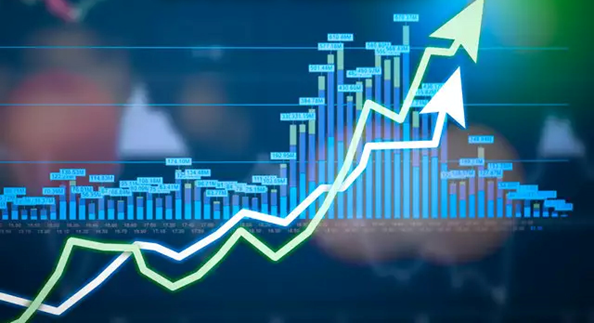

# **Process:**
    
**Data Collection:** 
    Collect historical stock price data for the company you want to predict stock prices. For this data should include 
    the date, opening price, closing price, and volume of shares traded.

**Data Preprocessing:** 
    Clean and preprocess the data by handling missing values, removing outliers, and normalizing the data.

**Data Preparation:** 
    Prepare the data for the LSTM model by splitting it into training and testing sets, and 
    reshaping it into the appropriate shape for the input layer of the LSTM.

**1.Model Building:** 
    Build the LSTM model using the Keras library in Python. You can start with a simple model with one LSTM layer and one dense
    output layer, and then experiment with different architectures and hyperparameters to improve the model's performance.

**2.Model Training:**
    Train the LSTM model on the training data using the .fit() method.

**3.Model Evaluation:** 
    Evaluate the model's performance on the test data by comparing the predicted stock prices to the actual prices. 
    You can use metrics such as mean absolute error, mean squared error, or r-squared to evaluate the model's performance.

**4.Model Deployment:** 
    Once you are satisfied with the model's performance, you can deploy the model to make predictions on new, unseen 
    stock price data.

This project can be broken down into several sub-tasks and can be a great way to get hands-on experience with Time Series 
using LSTM and also learn how to work with real-world data. It also has a great practical use-case and can be used to 
predict stock prices of a company and predict the future market trends.

**Creator : Santhanam.D**

<h1 style="background-color:Violet;text-align: center;font-size:24px;color:Black;">Data Collection:</h1>
</p>

In [2]:
pip install pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
#Reading the data from Yahoo finance using Datareader
start = '2010-01-01'
end='2022-10-31'
df=data.DataReader('^NSEI','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,5238.450195,5167.100098,5200.899902,5232.200195,0.0,5232.200195
2010-01-05,5288.350098,5242.399902,5277.149902,5277.899902,0.0,5277.899902
2010-01-06,5310.850098,5260.049805,5278.149902,5281.799805,0.0,5281.799805
2010-01-07,5302.549805,5244.750000,5281.799805,5263.100098,0.0,5263.100098
2010-01-08,5276.750000,5234.700195,5264.250000,5244.750000,0.0,5244.750000


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-24,17777.550781,17707.400391,17736.349609,17730.750000,45000.0,17730.750000
2022-10-25,17811.500000,17637.000000,17808.300781,17656.349609,251400.0,17656.349609
2022-10-27,17783.900391,17654.500000,17771.400391,17736.949219,324600.0,17736.949219
2022-10-28,17838.900391,17723.699219,17756.400391,17786.800781,250000.0,17786.800781
2022-10-31,18022.800781,17899.900391,17910.199219,18012.199219,227200.0,18012.199219


<h1 style="background-color:Violet;text-align: center;font-size:24px;color:Black;">Data Preprocessing:</h1>
</p>

In [6]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,5238.450195,5167.100098,5200.899902,5232.200195,0.0,5232.200195
1,2010-01-05,5288.350098,5242.399902,5277.149902,5277.899902,0.0,5277.899902
2,2010-01-06,5310.850098,5260.049805,5278.149902,5281.799805,0.0,5281.799805
3,2010-01-07,5302.549805,5244.750000,5281.799805,5263.100098,0.0,5263.100098
4,2010-01-08,5276.750000,5234.700195,5264.250000,5244.750000,0.0,5244.750000


In [7]:
df=df.drop(['Volume','Adj Close'],axis=1)
df.head()

,Date,High,Low,Open,Close
0,2010-01-04,5238.450195,5167.100098,5200.899902,5232.200195
1,2010-01-05,5288.350098,5242.399902,5277.149902,5277.899902
2,2010-01-06,5310.850098,5260.049805,5278.149902,5281.799805
3,2010-01-07,5302.549805,5244.750000,5281.799805,5263.100098
4,2010-01-08,5276.750000,5234.700195,5264.250000,5244.750000


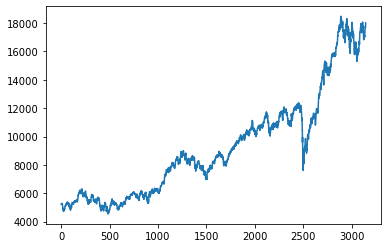

In [8]:
#Plotting the data
plt.plot(df.Close)

In [9]:
df

,Date,High,Low,Open,Close
0,2010-01-04,5238.450195,5167.100098,5200.899902,5232.200195
1,2010-01-05,5288.350098,5242.399902,5277.149902,5277.899902
2,2010-01-06,5310.850098,5260.049805,5278.149902,5281.799805
3,2010-01-07,5302.549805,5244.750000,5281.799805,5263.100098
4,2010-01-08,5276.750000,5234.700195,5264.250000,5244.750000
...,...,...,...,...,...
3141,2022-10-24,17777.550781,17707.400391,17736.349609,17730.750000
3142,2022-10-25,17811.500000,17637.000000,17808.300781,17656.349609
3143,2022-10-27,17783.900391,17654.500000,17771.400391,17736.949219
3144,2022-10-28,17838.900391,17723.699219,17756.400391,17786.800781


In [10]:
#Adding 100 day moving average
ma100=df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3141    16899.159492
3142    16910.495488
3143    16921.584980
3144    16933.609980
3145    16948.036465
Name: Close, Length: 3146, dtype: float64

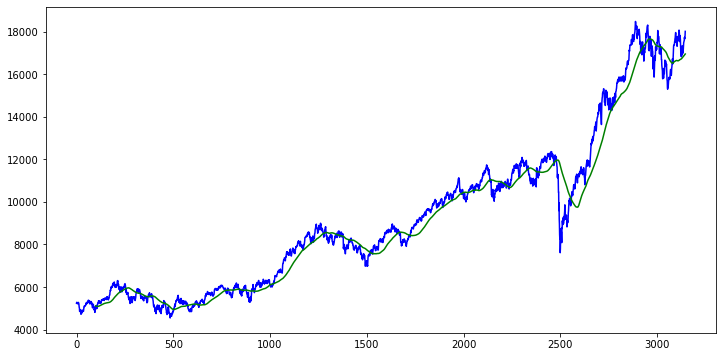

In [11]:
#Visualizing the data with inputs
plt.figure(figsize=(12,6))
plt.plot(df.Close,'b')
plt.plot(ma100,'g')

In [12]:
#Adding 200 day moving average
ma200=df.Close.rolling(200).mean()
ma200

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3141    16995.194526
3142    16994.450024
3143    16993.508521
3144    16993.713022
3145    16994.710522
Name: Close, Length: 3146, dtype: float64

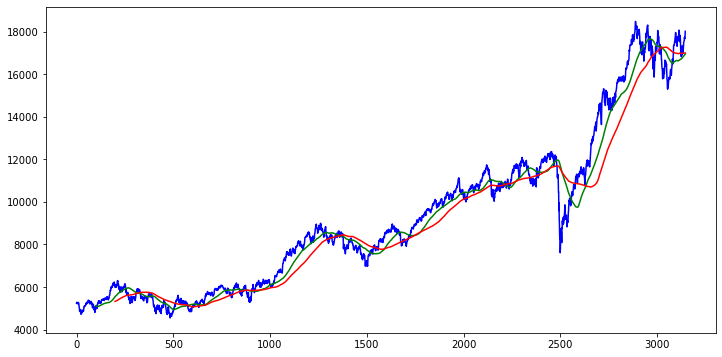

In [13]:
#Visualizing the data with inputs
plt.figure(figsize=(12,6))
plt.plot(df.Close,'b')
plt.plot(ma100,'g')
plt.plot(ma200,'r')

In [15]:
df.shape

(3146, 5)

<h1 style="background-color:Violet;text-align: center;font-size:24px;color:Black;">Data Preparation:</h1>
</p>

In [16]:
#Splitting the data into Training and Testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2202, 1)
(944, 1)


In [17]:
data_training.head()

,Close
0,5232.200195
1,5277.899902
2,5281.799805
3,5263.100098
4,5244.750000


In [18]:
data_testing.head()

,Close
2202,10792.500000
2203,10672.250000
2204,10727.349609
2205,10771.799805
2206,10802.150391


In [19]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [20]:
#Fit and transforming
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.09563127],
       [0.10198348],
       [0.10252556],
       ...,
       [0.8667417 ],
       [0.87787559],
       [0.87824386]])

In [21]:
data_training_array.shape

(2202, 1)

In [22]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

In [23]:
x_train.shape

(2102, 100, 1)

<h1 style="background-color:Orange;text-align: center;font-size:24px;color:Black;">1.Model building:</h1>
</p>

In [24]:
#Creating a Model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [27]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [28]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

<h1 style="background-color:Orange;text-align: center;font-size:24px;color:Black;">2.Model Training:</h1>
</p>

In [29]:
#Optimizing,Training and Fitting 
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
66/66 [==============================] - 33s 302ms/step - loss: 0.0351
Epoch 2/50
66/66 [==============================] - 20s 295ms/step - loss: 0.0095
Epoch 3/50
66/66 [==============================] - 20s 296ms/step - loss: 0.0079
Epoch 4/50
66/66 [==============================] - 20s 297ms/step - loss: 0.0076
Epoch 5/50
66/66 [==============================] - 20s 303ms/step - loss: 0.0068
Epoch 6/50
66/66 [==============================] - 20s 302ms/step - loss: 0.0067
Epoch 7/50
66/66 [==============================] - 19s 293ms/step - loss: 0.0060
Epoch 8/50
66/66 [==============================] - 19s 294ms/step - loss: 0.0054
Epoch 9/50
66/66 [==============================] - 19s 293ms/step - loss: 0.0056
Epoch 10/50
66/66 [==============================] - 19s 294ms/step - loss: 0.0052
Epoch 11/50
66/66 [==============================] - 19s 294ms/step - loss: 0.0046
Epoch 12/50
66/66 [==============================] - 19s 292ms/step - loss: 0.0048
Epoch 13/50
6

In [31]:
#Saving the model
model.save('LSTM_Nifty_Model.h5')

In [32]:
data_testing.head()

,Close
2202,10792.500000
2203,10672.250000
2204,10727.349609
2205,10771.799805
2206,10802.150391


In [33]:
data_training.tail(100)

,Close
2102,11346.200195
2103,11244.700195
2104,11360.799805
2105,11387.099609
2106,11389.450195
...,...
2197,10663.500000
2198,10729.849609
2199,10779.799805
2200,10859.900391


In [34]:
#Past 100 days data 
past_100days=data_training.tail(100)

In [35]:
#Appending past 100 days data
final_df=past_100days.append(data_testing,ignore_index=True)
final_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_6556\2571184783.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100days.append(data_testing,ignore_index=True)


,Close
0,11346.200195
1,11244.700195
2,11360.799805
3,11387.099609
4,11389.450195


In [36]:
#Fit and transforming
input_data=scaler.fit_transform(final_df)
input_data

array([[0.34379485],
       [0.33445448],
       [0.34513836],
       ...,
       [0.93189333],
       [0.93648085],
       [0.95722278]])

In [37]:
input_data.shape

(1044, 1)

<h1 style="background-color:Orange;text-align: center;font-size:24px;color:Black;">3.Model Evaluation:</h1>
</p>

In [48]:
#Testing
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [49]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(944, 100, 1)
(944,)


In [50]:
#Making Prediction
y_pred=model.predict(x_test)

30/30 [==============================] - 4s 123ms/step


In [51]:
y_pred.shape

(944, 1)

In [52]:
y_test

array([0.29284148, 0.28177566, 0.28684612, 0.29093658, 0.29372954,
       0.29860678, 0.29551932, 0.29306695, 0.28778936, 0.30151927,
       0.30184135, 0.30321253, 0.30337357, 0.30842561, 0.30482753,
       0.29643039, 0.2981144 , 0.29174178, 0.280791  , 0.27993061,
       0.27989377, 0.2963798 , 0.30214968, 0.30386128, 0.30589496,
       0.31768321, 0.31832279, 0.30674618, 0.30170331, 0.29642122,
       0.28856697, 0.28657472, 0.27889535, 0.27552724, 0.28759156,
       0.29259758, 0.29276329, 0.30090269, 0.29678006, 0.29414364,
       0.29284148, 0.29937514, 0.31078146, 0.31681357, 0.31729211,
       0.315194  , 0.32740085, 0.3396538 , 0.34338075, 0.34352337,
       0.35121649, 0.35446957, 0.36092963, 0.35988511, 0.35398186,
       0.34453563, 0.35640664, 0.35289133, 0.36438967, 0.37351383,
       0.37756744, 0.37119482, 0.36696633, 0.37321934, 0.36756448,
       0.37377148, 0.36570559, 0.36684672, 0.37114881, 0.37546466,
       0.38437259, 0.38121153, 0.36663966, 0.36493723, 0.37875

In [53]:
y_pred

array([[0.33194488],
       [0.33335772],
       [0.3346264 ],
       [0.33570868],
       [0.3366032 ],
       [0.33733806],
       [0.33797112],
       [0.33854473],
       [0.33907536],
       [0.33954972],
       [0.34000707],
       [0.34049436],
       [0.3410577 ],
       [0.34172475],
       [0.3425235 ],
       [0.34344852],
       [0.34446034],
       [0.3455035 ],
       [0.34648407],
       [0.34727135],
       [0.3477545 ],
       [0.34786838],
       [0.34767392],
       [0.34731898],
       [0.3469299 ],
       [0.3466287 ],
       [0.34655687],
       [0.3468215 ],
       [0.34742785],
       [0.34830204],
       [0.34931445],
       [0.35030258],
       [0.35111883],
       [0.35161167],
       [0.35167453],
       [0.35131386],
       [0.35061914],
       [0.34971768],
       [0.34877455],
       [0.34787712],
       [0.34708226],
       [0.3464124 ],
       [0.34589875],
       [0.34560943],
       [0.345634  ],
       [0.34604028],
       [0.34680906],
       [0.347

In [55]:
#Scale factor
scaler.scale_

array([9.20234041e-05])

In [56]:
scale_factor=1/9.20234041e-05

In [57]:
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

<h1 style="background-color:Orange;text-align: center;font-size:24px;color:Black;">4.Model Deployment:</h1>
</p>

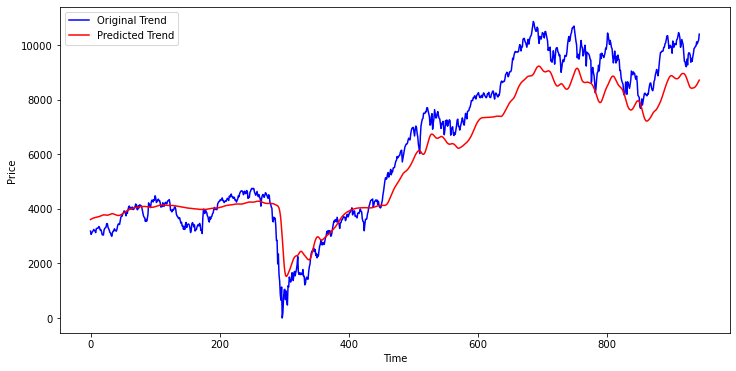

In [58]:
# Visualizing the results
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Trend')
plt.plot(y_pred,'r',label='Predicted Trend')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

More detailed analysis will be added in this project in future

**Thank You**